# Machine Learning Pipeline - Model Training

In this notebook, we pick up the transformed datasets and the selected variables that we saved in the previous notebooks.

# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
RANDOM_SEED = 42
ALPHA = 0.001

In [3]:
# load the train and test set with the engineered variables

# we built and saved these datasets in a previous notebook.
# If you haven't done so, go ahead and check the previous notebooks (step 2)
# to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.333333,0.75,0.521833,0.0,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,0.0,0.666667,0.750,0.514706,0.327869,0.0,0.0,0.8,0.8,0.333333,0.0,0.666667,0.50,0.50,0.666667,0.666667,0.000000,0.4,0.039511,0.0,0.0,0.339897,0.166448,1.0,0.75,1.0,1.000000,0.422489,0.502179,0.0,0.643070,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.8,0.75,0.654206,1.0,0.25,0.126939,0.25,0.50,1.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.429425,0.0,1.0,1.0,1.000000,0.333333,1.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.6,0.666667,0.500,0.058824,0.131148,0.0,0.0,0.9,0.9,0.333333,0.0,0.666667,0.50,1.00,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.604880,0.231260,1.0,1.00,1.0,1.000000,0.550351,0.000000,0.0,0.514455,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.0,0.75,0.074766,0.5,0.50,0.426657,0.50,0.50,1.0,0.000000,0.060329,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
2,0.500000,0.75,0.388581,0.0,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.2,0.444444,0.875,0.272059,0.114754,0.0,0.0,0.2,0.5,0.333333,0.0,0.333333,0.75,0.50,0.666667,0.666667,0.666667,1.0,0.116938,0.0,0.0,0.046233,0.125696,1.0,0.75,1.0,1.000000,0.315102,0.000000,0.0,0.294550,0.000000,0.5,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.327103,1.0,0.25,0.279267,0.50,0.50,1.0,0.224037,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.666667,0.75,0.0,0.0,0.0
3,0.000000,0.75,0.282098,0.0,1.0,0.0,0.000000,0.333333,1.0,0.25,0.0,0.181818,0.4,1.0,0.75,0.6,0.222222,0.250,0.691176,0.967213,0.0,0.0,0.5,0.2,0.333333,0.0,0.333333,0.50,0.25,0.333333,0.666667,0.000000,0.6,0.007264,0.0,0.0,0.352312,0.141408,1.0,0.50,0.0,0.333333,0.359675,0.000000,0.0,0.336216,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.75,0.275019,0.0,0.00,0.000000,0.50,0.50,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.727273,0.666667,0.75,0.0,0.0,1.0
4,0.000000,0.75,0.495064,0.0,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,0.6,0.333333,0.500,0.617647,0.934426,0.0,0.0,0.4,0.3,0.333333,0.0,0.333333,0.50,0.25,0.000000,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.299658,0.114566,1.0,1.00,1.0,1.000000,0.477632,0.000000,0.0,0.446478,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.000000,0.250000,1.0,0.333333,0.8,0.25,0.785047,0.0,0.25,0.177715,0.50,0.25,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [4]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,SalePrice
0,12.429216
1,12.139399
2,11.804849
3,11.112448
4,11.831379


In [5]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 3)

# if you haven't done so, go ahead and visit the previous notebook
# to find out how to select the features

features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleType',
 'SaleCondition']

In [6]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression: Lasso

Remember to set the seed.

In [7]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=ALPHA, random_state=RANDOM_SEED)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=42)

In [8]:
# evaluate the model:
# ====================

# remember that we log transformed the output (SalePrice)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 796165951
train rmse: 28216
train r2: 0.8671261204293634

test mse: 1079913595
test rmse: 32862
test r2: 0.8818040746937664

Average house price:  164500


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

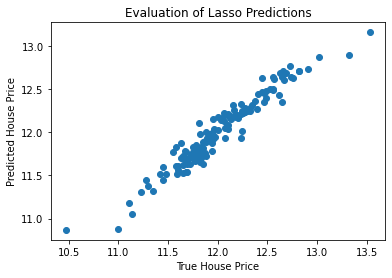

In [9]:
# let's evaluate our predictions with respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

We can see that our model is doing a pretty good job at estimating house prices.

In [10]:
y_test.reset_index(drop=True)

,SalePrice
0,11.947949
1,12.691580
2,11.652687
3,11.976659
4,12.661914
...,...
141,11.790557
142,12.089539
143,11.824080
144,11.884489


In [11]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      11.873549
1      12.687907
2      11.626314
3      11.947502
4      12.705517
         ...    
141    11.723640
142    12.067770
143    11.978583
144    11.730939
145    11.708792
Length: 146, dtype: float64

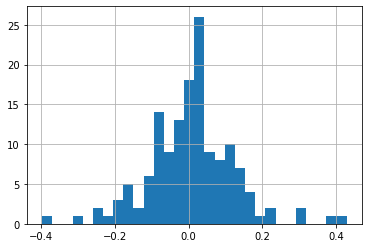

In [12]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

TODO: Find out a way to actually determine this mathematically. How could you tell which of two different distributions is closer to being gaussian?

There are two tests for normality
* Generate a Q-Q Plot. The closer it is to being linear, the more normal the distribution is
* Shapiro-Wilk Test: This will generate a p-value that tells us the probability that we can reject the null hypothesis (null being that it's normally distributed)


#### Q-Q Plot

In [23]:
import statsmodels.api as sm
import scipy.stats as stats

In [24]:
#errors

/Users/magreen/Anaconda3-2020_07/envs/dmlenv/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


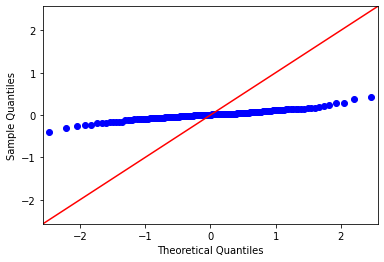

In [25]:
qqplot_fig = sm.qqplot(errors,line='45')
plt.show()

In [26]:
W, p = stats.shapiro(errors)
print("Results from Shaprio-Wilk Test: W = ", W," p = ",p)

Results from Shaprio-Wilk Test: W =  0.9705712795257568  p =  0.003127625910565257


This is not normal!

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

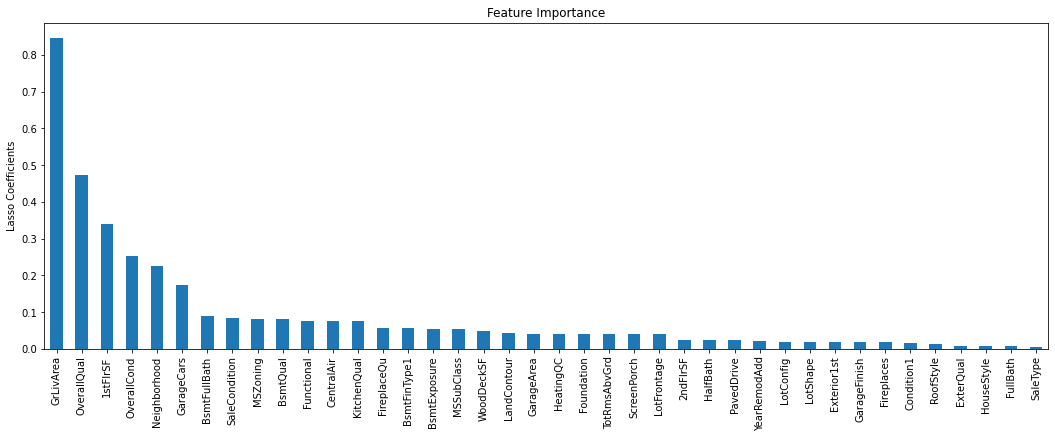

In [27]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

## Save the Model

In [28]:
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']

# Additional Resources


## Feature Engineering

- [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/?referralCode=A855148E05283015CF06) - Online Course
- [Packt Feature Engineering Cookbook](https://www.packtpub.com/data/python-feature-engineering-cookbook) - Book
- [Feature Engineering for Machine Learning: A comprehensive Overview](https://trainindata.medium.com/feature-engineering-for-machine-learning-a-comprehensive-overview-a7ad04c896f8) - Article
- [Practical Code Implementations of Feature Engineering for Machine Learning with Python](https://towardsdatascience.com/practical-code-implementations-of-feature-engineering-for-machine-learning-with-python-f13b953d4bcd) - Article

## Feature Selection

- [Feature Selection for Machine Learning](https://www.udemy.com/course/feature-selection-for-machine-learning/?referralCode=186501DF5D93F48C4F71) - Online Course
- [Feature Selection for Machine Learning: A comprehensive Overview](https://trainindata.medium.com/feature-selection-for-machine-learning-a-comprehensive-overview-bd571db5dd2d) - Article

## Machine Learning

- [Best Resources to Learn Machine Learning](https://trainindata.medium.com/find-out-the-best-resources-to-learn-machine-learning-cd560beec2b7) - Article
- [Machine Learning with Imbalanced Data](https://www.udemy.com/course/machine-learning-with-imbalanced-data/?referralCode=F30537642DA57D19ED83) - Online Course